In [3]:
import pandas as pd
import numpy as np

In [4]:
# 2.2 DATA PREPARATION

In [ ]:
#Importamos el data set
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [ ]:
#Leemos el data set
df = pd.read_csv(data)
#Normalizamos los nombres de columnas
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()
# Vemos los tipos de datos de cada columna
df.dtypes  
# Lista con los nombres de columna que no sean numero (objeto (texto)) para normalizar
strings= list(df.dtypes [df.dtypes == 'object'].index) # Solo nos quedamos con las que son objeto texto para normalizar
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [ ]:
#For para recorrer la lista con los nombres de columna (col toma cada nombre) y transformar cada una
for col in strings:
   df[col] = df[col].str.lower().str.replace(' ', '_') #Aca, col toma el nombre de cada columna y recorre aplicando cambio

In [8]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [9]:
#2.3 EXPLORATORY DATA ANALYSIS

In [ ]:
# Rerecorremos columnas y obtenemos datos como valores unicos y tipo
df.columns
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [21]:
# Distribucion

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

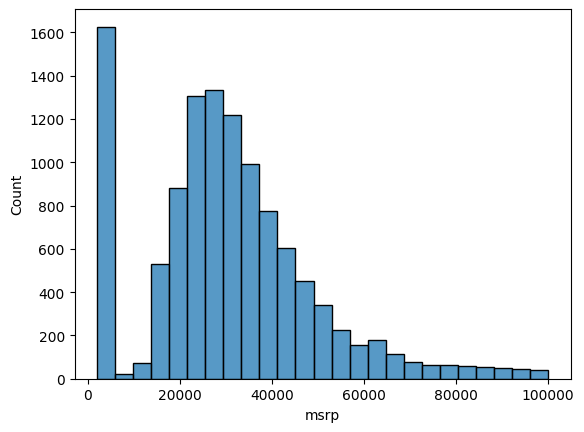

In [ ]:
# Graficamos un histograma con los valores de precios
sns.histplot(df.msrp[df.msrp < 100000], bins=25)
# En este caso es una distribucion de cola larga, y con valores atipicos 100 que es el valor minimo pagina
# Comun en ventas, internet y big data

In [ ]:
# Ejemplo Logaritmo natural se aplica sobre los valores para ver si toman distribucion normal
np.log1p([0 , 1, 100, 1000, 100000]) #Logaritmo natural datos( suma uno al log 1p)


array([ 0.        ,  0.69314718,  4.61512052,  6.90875478, 11.51293546])

<Axes: xlabel='msrp', ylabel='Count'>

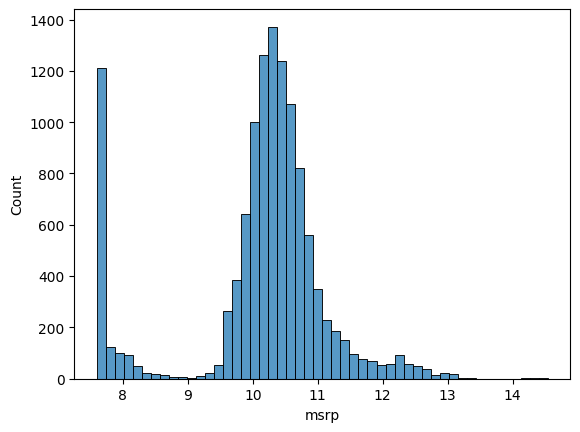

In [ ]:
# Aplicamos el log natural a la variable precios
prices_logs = np.log1p(df.msrp)
prices_logs
 # Grafico la distribucion de los valores aplicados el log y vemos que se normaliza
sns.histplot(prices_logs, bins=50) 

In [ ]:
# Datos perdidos (nulos)
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64